In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph
import statistics
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
#from umap import UMAP  
from sklearn.manifold import MDS
import seaborn as sns
from scipy.stats import pearsonr
import utils

In [ ]:
D_data = pd.read_csv('data/Denmark/Raw/P19_22_DK.csv')
USA_data = pd.read_csv('data/USA/filtered_USA_votes.csv')


In [ ]:
D_PA, D_PAV, D_PAVP, D_PP = utils.dict_create(D_data, 'aktørid','party','afstemningid','typeid_x')
US_PA,US_PAV,US_PAVP,US_PP = utils.dict_create(USA_data,'icpsr','party_code','rollnumber','cast_code')


In [7]:
D_thres = np.average(utils.calc_thres(D_PP,D_PA,D_PAV))

In [8]:
edgelist = utils.edgelist_calc(D_PA,D_PAV, D_thres)
df = pd.DataFrame(edgelist, columns=["Source", "Target"])
df.to_csv("Denmark_edgelist.csv", index=False)
G_denmark = nx.from_edgelist(edgelist)

In [9]:
len(edgelist)

14938

In [10]:
list_of_dangle = [node for node in G_denmark.nodes if G_denmark.degree(node) == 0]
list_of_dangle

[]

In [11]:
U_thres = np.average(utils.calc_thres(US_PP, US_PA, US_PAV))

In [12]:
USA_inter= utils.calc_inter_edges(US_PP,US_PA,US_PAV)

In [13]:
U_edgelist = utils.edgelist_calc(US_PA, US_PAV, U_thres)
U_edgelist = (U_edgelist + USA_inter)
df = pd.DataFrame(U_edgelist, columns=["Source", "Target"])
df.to_csv("USA_edgelist.csv", index=False)
G_USA = nx.from_edgelist(U_edgelist)

In [14]:
list_of_dangle = [node for node in G_USA.nodes if G_USA.degree(node) == 0]
list_of_dangle

[]

In [15]:
# Create node to community mapping based on party codes
node_to_community = {}
party_to_community = {
    100: 0,  # Democrat
    200: 1,  # Republican 
    328: 2,  # Independent
}

for icpsr in US_PAVP:
    party_code = US_PAVP[icpsr][0][2]  # Get party code from first vote
    node_to_community[icpsr] = party_to_community.get(party_code, 3)  # Default 3 for other parties

# Color mapping
community_to_color = {
    0: 'blue',      # Democrats
    1: 'red',       # Republicans
    2: 'green',     # Independents
    3: 'gray'       # Others
}
node_color = {node: community_to_color[community_id] 
              for node, community_id in node_to_community.items()}



/opt/anaconda3/envs/umap_env/lib/python3.9/site-packages/netgraph/_node_layout.py:1550: UserWarning: Graph contains a single community. Unable to compute a community layout. Computing spring layout instead.
  warnings.warn("Graph contains a single community. Unable to compute a community layout. Computing spring layout instead.")
/opt/anaconda3/envs/umap_env/lib/python3.9/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


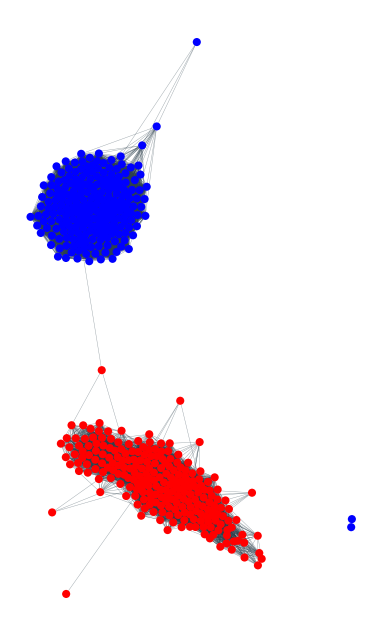

In [16]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
Graph(G_USA,
      node_color=node_color,
      node_edge_width=0,
      node_size=1,
      edge_width=0.1,
      edge_alpha=0.5,
      node_layout='community', 
      node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax)
plt.show()

In [17]:
set(D_data['party'])

{'Alternativet',
 'Borgernes Parti',
 'Danmarksdemokraterne',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten',
 'Liberal Alliance',
 'Moderaterne',
 'Radikale Venstre',
 'Sambandsflokkurin',
 'Siumut',
 'Socialdemokratiet',
 'Socialistisk Folkeparti',
 'Uden for folketingsgrupperne',
 'Venstre'}

In [ ]:
# Create node to community mapping based on party codes
node_to_community = {}
party_to_community = {
    'Alternativet': 0,  
    'Danmarksdemokraterne': 1,   
    'Dansk Folkeparti': 2,
    'Det Konservative Folkeparti': 3,
    'Enhedslisten': 4,
    'Frie Grønne': 5,
    'Liberal Alliance': 6,
    'Moderaterne': 7,
    'Radikale Venstre': 8,
    'Sambandsflokkurin': 9,
    'Siumut': 10,
    'Socialdemokratiet': 11,
    'Socialistisk Folkeparti': 12,
    'Uden for folketingsgrupperne': 13,
    'Venstre': 14,
     

}

# Color mapping
community_to_color = {
   0: 'green',
   1: 'lightblue', 
   2: 'yellow',
   3: 'darkgreen',
   4: 'orange',
   5: 'cyan',
   6: 'blue',
   7: 'magenta',
   8: 'purple',
   9: 'black',
   10: 'gray',
   11: 'red',
   12: 'pink',
   13: 'brown',
   14: 'navy'
}

node_to_community = {}
for aktor_id in D_PAVP:
   party_name = D_PAVP[aktor_id][0][2]  # Get party name from first vote
   node_to_community[aktor_id] = party_to_community.get(party_name, 0)

node_color = {node: community_to_color[community_id] 
              for node, community_id in node_to_community.items()}

NameError: name 'PAVP' is not defined

c:\Users\kubic\OneDrive\Dokumenty\envs\polarization\lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community 13. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")


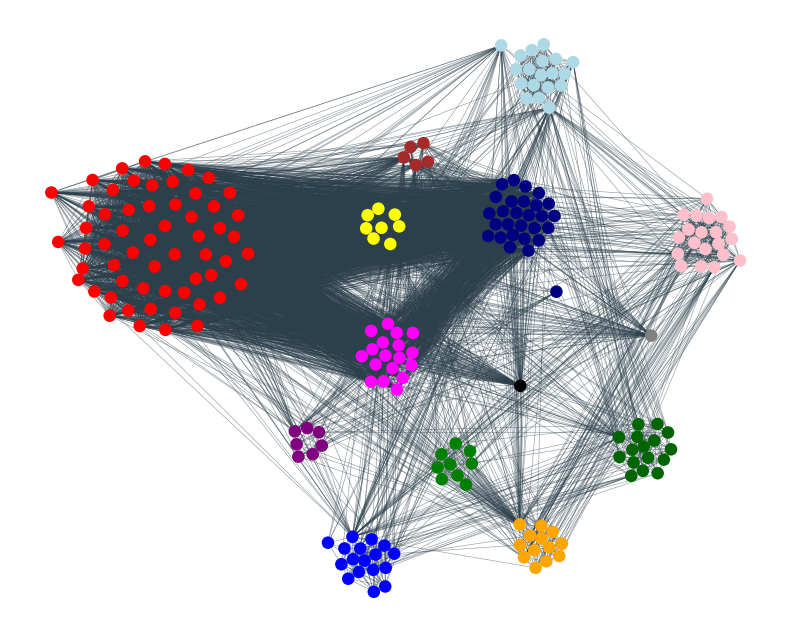

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
Graph(G_denmark,
      node_color=node_color,
      node_edge_width=0,
      node_size=1,
      edge_width=0.1,
      edge_alpha=0.5,
      node_layout='community', 
      node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax)
plt.show()